# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

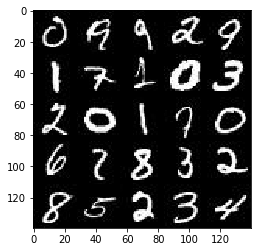

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

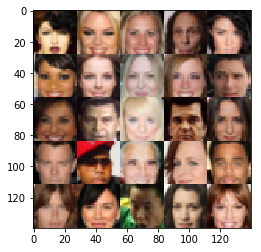

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32)
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [ ]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # alpha for leaky Relu
    alpha =0.2
    
    """ article recommendations:
    Architecture guidelines for stable Deep Convolutional GANs
     Replace any pooling layers with strided convolutions (discriminator) and fractional-strided
    convolutions (generator).
     Use batchnorm in both the generator and the discriminator.
        except generator output layer and the discriminator input layer.
     Remove fully connected hidden layers for deeper architectures.
     Use ReLU activation in generator for all layers except for the output, which uses Tanh.
     Use LeakyReLU activation in the discriminator for all layers."""

    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu2, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [40]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # alpha for leaky Relu
    alpha =0.2
    
    
    """ article recommendations:
    Architecture guidelines for stable Deep Convolutional GANs
     Replace any pooling layers with strided convolutions (discriminator) and fractional-strided
    convolutions (generator).
     Use batchnorm in both the generator and the discriminator.
        except generator output layer and the discriminator input layer.
     Remove fully connected hidden layers for deeper architectures.
     Use ReLU activation in generator for all layers except for the output, which uses Tanh.
     Use LeakyReLU activation in the discriminator for all layers."""
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not(is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)

        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.nn.relu(x1)
        # 7x7 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 4, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.relu(x2)
        # 14x14 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.nn.relu(x3)
        # 14x14 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 4, strides=2, padding='same')
        # 28x28x3 now
        out = tf.tanh(logits)
        
    return out    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [41]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [42]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt  

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [43]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [50]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    losses = []
    steps = 0
    print_every=100
    show_every = 400
    n_images=25
    
    # define channel dimension
    if(data_image_mode=="RGB"):
        out_channel_dim = 3
    else:
        out_channel_dim = 1
            
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    
    print(data_shape)
    print(image_width)
    print(image_height)
    print(image_channels)

    # define generator and discriminator (create)
    inputs_real, inputs_z, learning_rate_tf = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate_tf, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_tf:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_images,inputs_z: batch_z, learning_rate_tf:learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = sess.run(d_loss, {inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((d_loss, g_loss))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, inputs_z, out_channel_dim, data_image_mode)

    return losses              
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
28
28
1
Epoch 1/2... Discriminator Loss: 1.2068... Generator Loss: 0.5888
Epoch 1/2... Discriminator Loss: 0.9597... Generator Loss: 0.7273
Epoch 1/2... Discriminator Loss: 1.1072... Generator Loss: 0.4846
Epoch 1/2... Discriminator Loss: 0.7460... Generator Loss: 0.9991


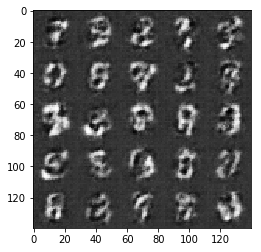

Epoch 1/2... Discriminator Loss: 0.7629... Generator Loss: 0.9947
Epoch 1/2... Discriminator Loss: 0.6061... Generator Loss: 1.0550
Epoch 1/2... Discriminator Loss: 0.5173... Generator Loss: 1.4384
Epoch 1/2... Discriminator Loss: 0.8401... Generator Loss: 0.6430


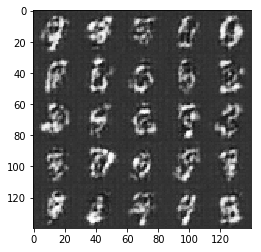

Epoch 1/2... Discriminator Loss: 0.3452... Generator Loss: 1.6780
Epoch 1/2... Discriminator Loss: 0.8246... Generator Loss: 0.6634
Epoch 1/2... Discriminator Loss: 0.3355... Generator Loss: 1.7206
Epoch 1/2... Discriminator Loss: 0.2487... Generator Loss: 1.8054


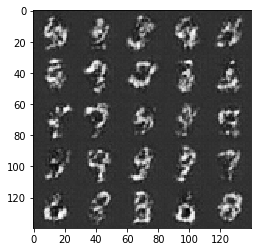

Epoch 1/2... Discriminator Loss: 0.3813... Generator Loss: 1.5767
Epoch 1/2... Discriminator Loss: 0.5939... Generator Loss: 0.9536
Epoch 1/2... Discriminator Loss: 0.3674... Generator Loss: 2.7340
Epoch 1/2... Discriminator Loss: 0.2277... Generator Loss: 2.0730


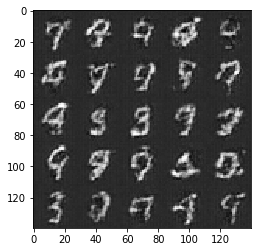

Epoch 1/2... Discriminator Loss: 0.3059... Generator Loss: 2.1401
Epoch 1/2... Discriminator Loss: 0.8102... Generator Loss: 0.6905
Epoch 1/2... Discriminator Loss: 0.3808... Generator Loss: 1.4086
Epoch 1/2... Discriminator Loss: 0.3810... Generator Loss: 2.3302


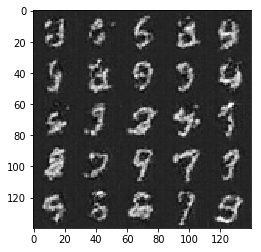

Epoch 1/2... Discriminator Loss: 0.2918... Generator Loss: 1.8958
Epoch 1/2... Discriminator Loss: 0.1957... Generator Loss: 2.0385
Epoch 1/2... Discriminator Loss: 0.2574... Generator Loss: 2.1044
Epoch 1/2... Discriminator Loss: 0.2132... Generator Loss: 2.2690


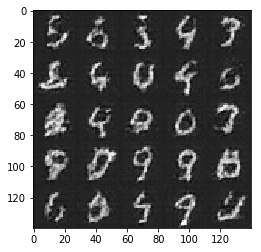

Epoch 1/2... Discriminator Loss: 0.8663... Generator Loss: 0.6267
Epoch 1/2... Discriminator Loss: 0.4154... Generator Loss: 1.2094
Epoch 1/2... Discriminator Loss: 0.4268... Generator Loss: 1.1614
Epoch 1/2... Discriminator Loss: 0.5201... Generator Loss: 1.1230


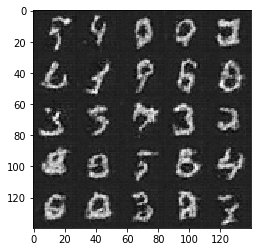

Epoch 1/2... Discriminator Loss: 0.4024... Generator Loss: 1.9342
Epoch 1/2... Discriminator Loss: 1.6343... Generator Loss: 0.2934
Epoch 1/2... Discriminator Loss: 0.4195... Generator Loss: 1.4516
Epoch 1/2... Discriminator Loss: 0.5469... Generator Loss: 1.1312


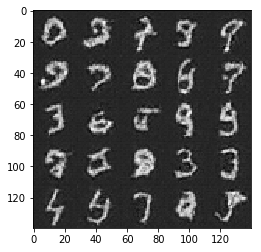

Epoch 1/2... Discriminator Loss: 0.2087... Generator Loss: 1.9307
Epoch 1/2... Discriminator Loss: 0.2196... Generator Loss: 2.0634
Epoch 1/2... Discriminator Loss: 0.8845... Generator Loss: 0.6481
Epoch 1/2... Discriminator Loss: 0.1886... Generator Loss: 2.3951


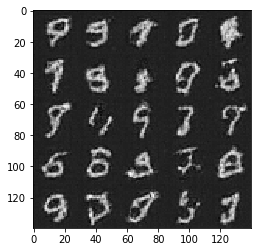

Epoch 1/2... Discriminator Loss: 0.1880... Generator Loss: 3.2580
Epoch 1/2... Discriminator Loss: 0.2275... Generator Loss: 2.5701
Epoch 1/2... Discriminator Loss: 0.9321... Generator Loss: 0.6540
Epoch 1/2... Discriminator Loss: 0.6813... Generator Loss: 0.9880


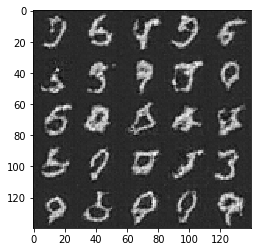

Epoch 1/2... Discriminator Loss: 0.2616... Generator Loss: 1.9956
Epoch 1/2... Discriminator Loss: 0.3958... Generator Loss: 1.5041
Epoch 1/2... Discriminator Loss: 0.3268... Generator Loss: 1.6408
Epoch 1/2... Discriminator Loss: 0.6502... Generator Loss: 0.9439


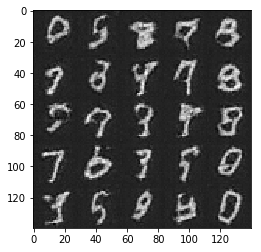

Epoch 1/2... Discriminator Loss: 0.5202... Generator Loss: 1.2144
Epoch 1/2... Discriminator Loss: 0.3996... Generator Loss: 1.3049
Epoch 1/2... Discriminator Loss: 0.4396... Generator Loss: 1.4559
Epoch 1/2... Discriminator Loss: 0.2059... Generator Loss: 2.0489


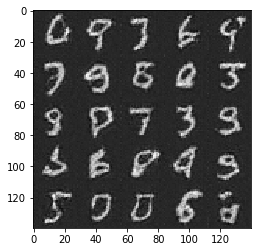

Epoch 1/2... Discriminator Loss: 0.1953... Generator Loss: 2.0751
Epoch 1/2... Discriminator Loss: 0.2643... Generator Loss: 1.8584
Epoch 1/2... Discriminator Loss: 0.1349... Generator Loss: 3.0694
Epoch 1/2... Discriminator Loss: 0.5294... Generator Loss: 1.5417


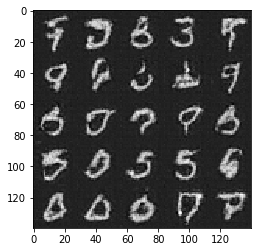

Epoch 1/2... Discriminator Loss: 0.1590... Generator Loss: 2.3421
Epoch 1/2... Discriminator Loss: 0.1991... Generator Loss: 2.0733
Epoch 1/2... Discriminator Loss: 0.4354... Generator Loss: 3.9536
Epoch 1/2... Discriminator Loss: 0.3028... Generator Loss: 1.7756


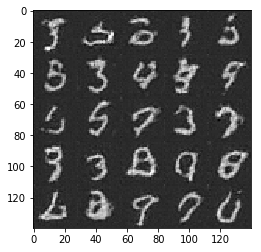

Epoch 1/2... Discriminator Loss: 0.1141... Generator Loss: 2.7973
Epoch 1/2... Discriminator Loss: 0.6144... Generator Loss: 1.1977
Epoch 1/2... Discriminator Loss: 0.8883... Generator Loss: 0.7580
Epoch 1/2... Discriminator Loss: 0.6809... Generator Loss: 0.9086


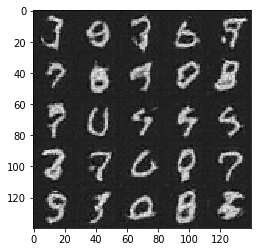

Epoch 2/2... Discriminator Loss: 0.6701... Generator Loss: 0.9325
Epoch 2/2... Discriminator Loss: 0.2288... Generator Loss: 2.7679
Epoch 2/2... Discriminator Loss: 0.4799... Generator Loss: 1.4557
Epoch 2/2... Discriminator Loss: 0.2370... Generator Loss: 2.0208


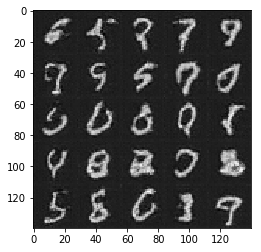

Epoch 2/2... Discriminator Loss: 0.5183... Generator Loss: 1.1477
Epoch 2/2... Discriminator Loss: 0.1737... Generator Loss: 2.4926
Epoch 2/2... Discriminator Loss: 0.4808... Generator Loss: 1.4381
Epoch 2/2... Discriminator Loss: 0.3357... Generator Loss: 1.6489


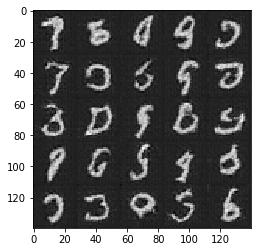

Epoch 2/2... Discriminator Loss: 0.2709... Generator Loss: 2.0342
Epoch 2/2... Discriminator Loss: 0.5804... Generator Loss: 1.2816
Epoch 2/2... Discriminator Loss: 0.6522... Generator Loss: 0.8676
Epoch 2/2... Discriminator Loss: 0.1719... Generator Loss: 2.6229


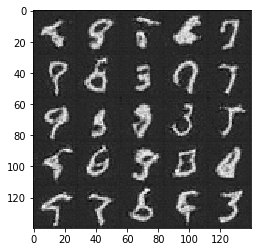

Epoch 2/2... Discriminator Loss: 0.0963... Generator Loss: 3.0965
Epoch 2/2... Discriminator Loss: 0.9406... Generator Loss: 0.6667
Epoch 2/2... Discriminator Loss: 0.3336... Generator Loss: 1.6512
Epoch 2/2... Discriminator Loss: 0.2433... Generator Loss: 2.0509


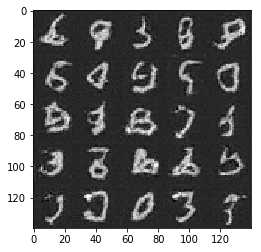

Epoch 2/2... Discriminator Loss: 0.4692... Generator Loss: 1.2982
Epoch 2/2... Discriminator Loss: 0.0857... Generator Loss: 3.2197
Epoch 2/2... Discriminator Loss: 0.2158... Generator Loss: 2.2586
Epoch 2/2... Discriminator Loss: 0.5617... Generator Loss: 1.5005


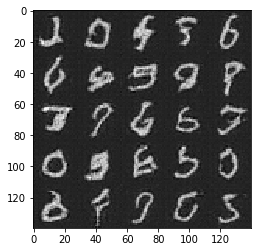

Epoch 2/2... Discriminator Loss: 0.4506... Generator Loss: 1.4768
Epoch 2/2... Discriminator Loss: 0.2284... Generator Loss: 1.9749
Epoch 2/2... Discriminator Loss: 0.5148... Generator Loss: 1.1930
Epoch 2/2... Discriminator Loss: 0.2352... Generator Loss: 2.2380


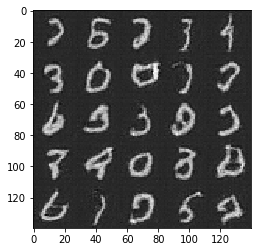

Epoch 2/2... Discriminator Loss: 0.2552... Generator Loss: 1.8877
Epoch 2/2... Discriminator Loss: 0.2976... Generator Loss: 1.9257
Epoch 2/2... Discriminator Loss: 0.1622... Generator Loss: 3.9815
Epoch 2/2... Discriminator Loss: 0.2541... Generator Loss: 1.9010


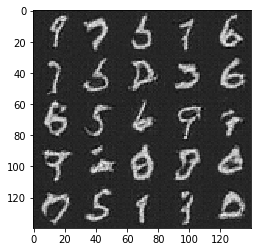

Epoch 2/2... Discriminator Loss: 0.4119... Generator Loss: 2.3413
Epoch 2/2... Discriminator Loss: 0.4313... Generator Loss: 1.9463
Epoch 2/2... Discriminator Loss: 0.2411... Generator Loss: 2.0007
Epoch 2/2... Discriminator Loss: 0.5738... Generator Loss: 1.2147


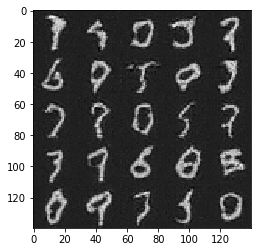

Epoch 2/2... Discriminator Loss: 0.3555... Generator Loss: 1.3926
Epoch 2/2... Discriminator Loss: 0.1999... Generator Loss: 2.0450
Epoch 2/2... Discriminator Loss: 0.6635... Generator Loss: 1.1876
Epoch 2/2... Discriminator Loss: 0.4799... Generator Loss: 1.4667


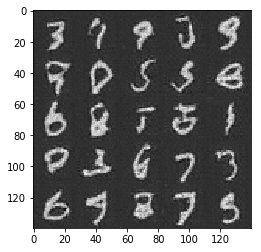

Epoch 2/2... Discriminator Loss: 0.3233... Generator Loss: 1.8825
Epoch 2/2... Discriminator Loss: 0.1320... Generator Loss: 2.9447
Epoch 2/2... Discriminator Loss: 0.5562... Generator Loss: 1.3349
Epoch 2/2... Discriminator Loss: 0.5622... Generator Loss: 1.4544


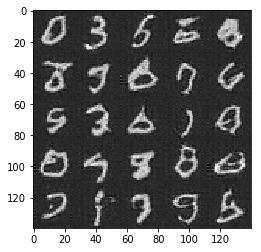

Epoch 2/2... Discriminator Loss: 0.1485... Generator Loss: 2.8184
Epoch 2/2... Discriminator Loss: 0.3827... Generator Loss: 1.8244
Epoch 2/2... Discriminator Loss: 0.3923... Generator Loss: 1.5796
Epoch 2/2... Discriminator Loss: 0.7040... Generator Loss: 1.2308


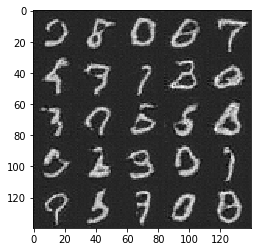

Epoch 2/2... Discriminator Loss: 0.7305... Generator Loss: 0.9397
Epoch 2/2... Discriminator Loss: 0.1698... Generator Loss: 2.9621
Epoch 2/2... Discriminator Loss: 0.4527... Generator Loss: 2.2977
Epoch 2/2... Discriminator Loss: 0.2129... Generator Loss: 2.8526


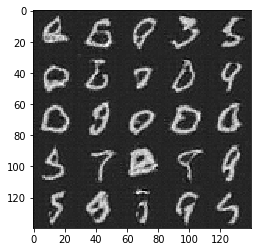

Epoch 2/2... Discriminator Loss: 0.2181... Generator Loss: 1.9820
Epoch 2/2... Discriminator Loss: 0.5240... Generator Loss: 1.5954
Epoch 2/2... Discriminator Loss: 0.1118... Generator Loss: 3.4516
Epoch 2/2... Discriminator Loss: 0.8176... Generator Loss: 0.7704


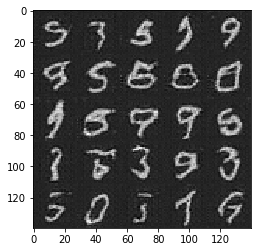

Epoch 2/2... Discriminator Loss: 0.1376... Generator Loss: 3.7889
Epoch 2/2... Discriminator Loss: 0.2541... Generator Loss: 2.4294
Epoch 2/2... Discriminator Loss: 0.3466... Generator Loss: 2.3720
Epoch 2/2... Discriminator Loss: 0.1561... Generator Loss: 3.1682


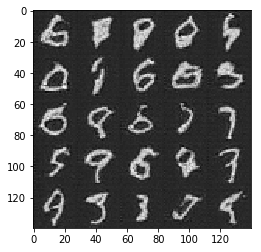

Epoch 2/2... Discriminator Loss: 0.2139... Generator Loss: 1.9412
Epoch 2/2... Discriminator Loss: 0.4757... Generator Loss: 1.5222
Epoch 2/2... Discriminator Loss: 0.3299... Generator Loss: 1.5780
Epoch 2/2... Discriminator Loss: 0.4277... Generator Loss: 1.6037


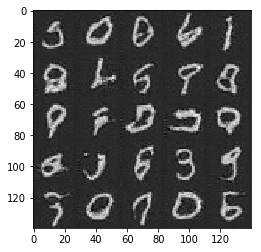

In [51]:
batch_size = 10
z_dim = 50
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
28
28
3
Epoch 1/1... Discriminator Loss: 1.1414... Generator Loss: 0.6498
Epoch 1/1... Discriminator Loss: 0.4486... Generator Loss: 1.6629
Epoch 1/1... Discriminator Loss: 1.0937... Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 0.9540... Generator Loss: 0.9033


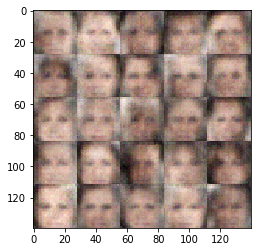

Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 0.7520
Epoch 1/1... Discriminator Loss: 0.8833... Generator Loss: 0.9525
Epoch 1/1... Discriminator Loss: 1.5777... Generator Loss: 0.3973
Epoch 1/1... Discriminator Loss: 0.8650... Generator Loss: 0.6880


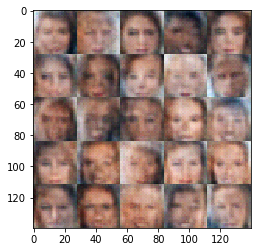

Epoch 1/1... Discriminator Loss: 0.8798... Generator Loss: 0.6397
Epoch 1/1... Discriminator Loss: 0.8207... Generator Loss: 1.9349
Epoch 1/1... Discriminator Loss: 0.6252... Generator Loss: 1.2615
Epoch 1/1... Discriminator Loss: 1.5916... Generator Loss: 0.3819


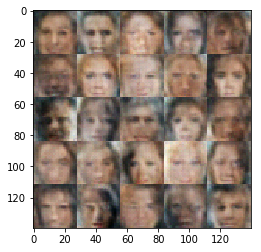

Epoch 1/1... Discriminator Loss: 0.2290... Generator Loss: 3.4599
Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 2.1354
Epoch 1/1... Discriminator Loss: 0.4745... Generator Loss: 2.2981
Epoch 1/1... Discriminator Loss: 0.5697... Generator Loss: 1.1540


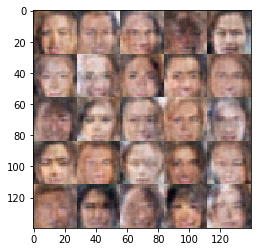

Epoch 1/1... Discriminator Loss: 0.1302... Generator Loss: 5.8237
Epoch 1/1... Discriminator Loss: 0.6485... Generator Loss: 0.9145
Epoch 1/1... Discriminator Loss: 0.1160... Generator Loss: 5.0403
Epoch 1/1... Discriminator Loss: 0.7193... Generator Loss: 2.0958


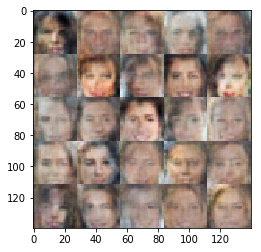

Epoch 1/1... Discriminator Loss: 0.1201... Generator Loss: 4.1133
Epoch 1/1... Discriminator Loss: 0.1801... Generator Loss: 12.6731
Epoch 1/1... Discriminator Loss: 0.0611... Generator Loss: 8.8771
Epoch 1/1... Discriminator Loss: 0.1294... Generator Loss: 3.8264


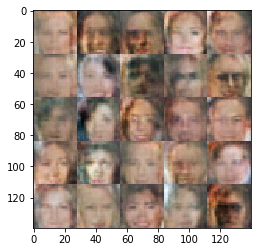

Epoch 1/1... Discriminator Loss: 0.2371... Generator Loss: 2.4229
Epoch 1/1... Discriminator Loss: 0.1803... Generator Loss: 9.1123
Epoch 1/1... Discriminator Loss: 0.1921... Generator Loss: 3.5893
Epoch 1/1... Discriminator Loss: 0.1024... Generator Loss: 5.4792


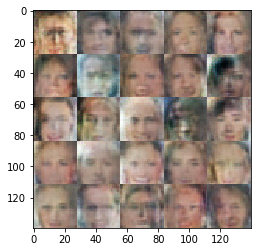

Epoch 1/1... Discriminator Loss: 1.8690... Generator Loss: 2.2746
Epoch 1/1... Discriminator Loss: 0.2979... Generator Loss: 3.6856
Epoch 1/1... Discriminator Loss: 0.2021... Generator Loss: 4.3177
Epoch 1/1... Discriminator Loss: 0.2140... Generator Loss: 7.9700


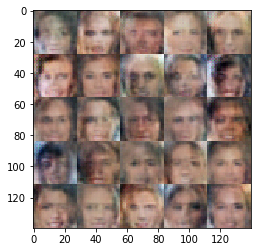

Epoch 1/1... Discriminator Loss: 0.4720... Generator Loss: 2.5748
Epoch 1/1... Discriminator Loss: 0.0670... Generator Loss: 14.3640
Epoch 1/1... Discriminator Loss: 0.2874... Generator Loss: 4.6102
Epoch 1/1... Discriminator Loss: 0.4974... Generator Loss: 3.0939


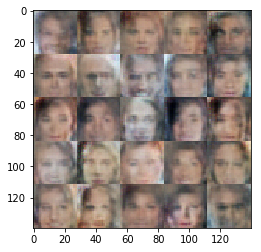

Epoch 1/1... Discriminator Loss: 0.7490... Generator Loss: 1.1780
Epoch 1/1... Discriminator Loss: 0.5413... Generator Loss: 2.7106
Epoch 1/1... Discriminator Loss: 0.1510... Generator Loss: 12.5912
Epoch 1/1... Discriminator Loss: 0.6086... Generator Loss: 11.0286


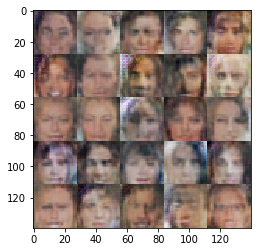

Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 2.0228
Epoch 1/1... Discriminator Loss: 0.1733... Generator Loss: 4.4681
Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 1.2660
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 0.8831


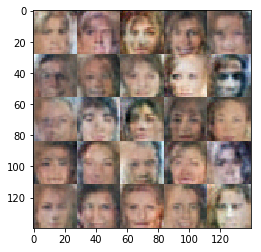

Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 0.1585... Generator Loss: 8.3291
Epoch 1/1... Discriminator Loss: 0.1278... Generator Loss: 10.2738
Epoch 1/1... Discriminator Loss: 0.1986... Generator Loss: 5.6564


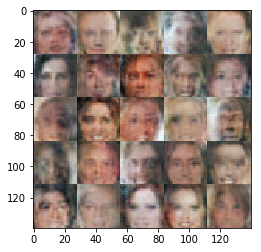

Epoch 1/1... Discriminator Loss: 0.7486... Generator Loss: 1.6099
Epoch 1/1... Discriminator Loss: 0.0294... Generator Loss: 8.2540
Epoch 1/1... Discriminator Loss: 0.3525... Generator Loss: 3.1100
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 0.8024


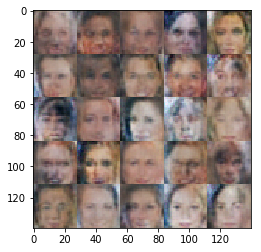

Epoch 1/1... Discriminator Loss: 0.0897... Generator Loss: 7.9616
Epoch 1/1... Discriminator Loss: 0.2569... Generator Loss: 4.0327
Epoch 1/1... Discriminator Loss: 0.5084... Generator Loss: 1.7230
Epoch 1/1... Discriminator Loss: 0.1272... Generator Loss: 3.9063


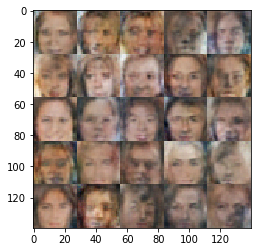

Epoch 1/1... Discriminator Loss: 1.7518... Generator Loss: 0.2720
Epoch 1/1... Discriminator Loss: 0.0872... Generator Loss: 12.8284
Epoch 1/1... Discriminator Loss: 0.3070... Generator Loss: 3.3120
Epoch 1/1... Discriminator Loss: 0.0639... Generator Loss: 8.1651


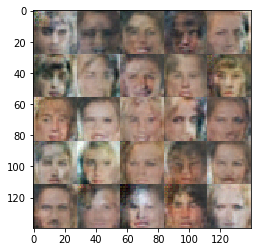

Epoch 1/1... Discriminator Loss: 0.0821... Generator Loss: 4.7980
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 2.2431
Epoch 1/1... Discriminator Loss: 0.1811... Generator Loss: 4.3567
Epoch 1/1... Discriminator Loss: 0.6015... Generator Loss: 1.1476


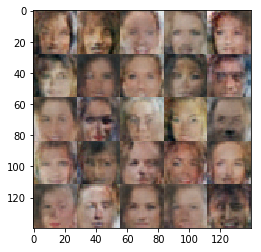

Epoch 1/1... Discriminator Loss: 0.6599... Generator Loss: 2.4991
Epoch 1/1... Discriminator Loss: 1.6960... Generator Loss: 0.2610
Epoch 1/1... Discriminator Loss: 1.0311... Generator Loss: 1.5030
Epoch 1/1... Discriminator Loss: 0.3979... Generator Loss: 1.5814


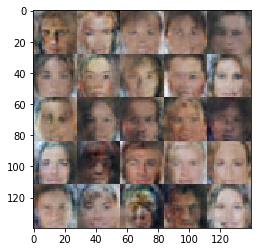

Epoch 1/1... Discriminator Loss: 0.2433... Generator Loss: 2.6764
Epoch 1/1... Discriminator Loss: 0.0807... Generator Loss: 9.7306
Epoch 1/1... Discriminator Loss: 0.2395... Generator Loss: 7.8232
Epoch 1/1... Discriminator Loss: 0.6806... Generator Loss: 0.9120


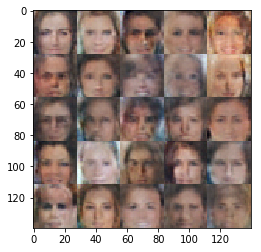

Epoch 1/1... Discriminator Loss: 0.9153... Generator Loss: 7.3240
Epoch 1/1... Discriminator Loss: 0.3498... Generator Loss: 1.6179
Epoch 1/1... Discriminator Loss: 0.6180... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 0.6037... Generator Loss: 1.0643


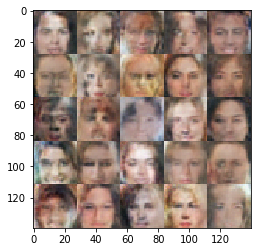

Epoch 1/1... Discriminator Loss: 0.1649... Generator Loss: 4.2681
Epoch 1/1... Discriminator Loss: 1.5012... Generator Loss: 0.5689
Epoch 1/1... Discriminator Loss: 0.8563... Generator Loss: 2.6767
Epoch 1/1... Discriminator Loss: 0.1138... Generator Loss: 3.8634


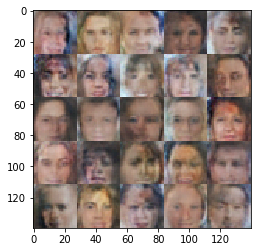

Epoch 1/1... Discriminator Loss: 0.1690... Generator Loss: 5.4863
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 0.8125
Epoch 1/1... Discriminator Loss: 1.2228... Generator Loss: 0.4916
Epoch 1/1... Discriminator Loss: 0.7222... Generator Loss: 7.4314


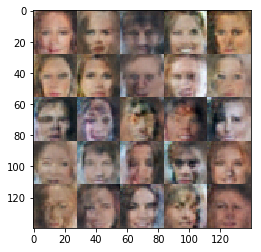

Epoch 1/1... Discriminator Loss: 0.2291... Generator Loss: 2.9176
Epoch 1/1... Discriminator Loss: 0.1924... Generator Loss: 3.7817
Epoch 1/1... Discriminator Loss: 0.6557... Generator Loss: 1.1613
Epoch 1/1... Discriminator Loss: 0.5349... Generator Loss: 1.2597


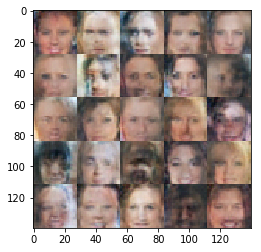

Epoch 1/1... Discriminator Loss: 0.4299... Generator Loss: 2.7250
Epoch 1/1... Discriminator Loss: 0.1469... Generator Loss: 5.3616
Epoch 1/1... Discriminator Loss: 0.3742... Generator Loss: 1.7001
Epoch 1/1... Discriminator Loss: 0.4381... Generator Loss: 1.4815


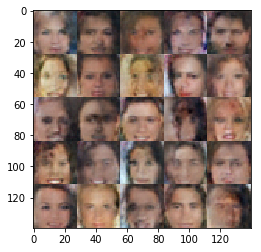

Epoch 1/1... Discriminator Loss: 0.6074... Generator Loss: 1.1375
Epoch 1/1... Discriminator Loss: 0.7487... Generator Loss: 1.1901
Epoch 1/1... Discriminator Loss: 0.2158... Generator Loss: 4.8257
Epoch 1/1... Discriminator Loss: 2.2207... Generator Loss: 0.1613


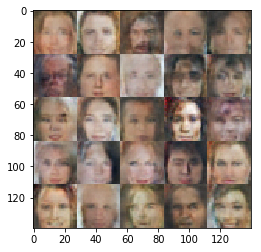

Epoch 1/1... Discriminator Loss: 0.2426... Generator Loss: 3.2211
Epoch 1/1... Discriminator Loss: 0.3415... Generator Loss: 1.9830
Epoch 1/1... Discriminator Loss: 0.2791... Generator Loss: 2.2924
Epoch 1/1... Discriminator Loss: 0.4076... Generator Loss: 1.6075


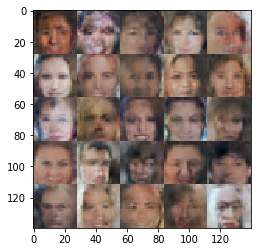

Epoch 1/1... Discriminator Loss: 0.6494... Generator Loss: 1.0587
Epoch 1/1... Discriminator Loss: 0.1433... Generator Loss: 3.4002
Epoch 1/1... Discriminator Loss: 0.2172... Generator Loss: 4.4639
Epoch 1/1... Discriminator Loss: 0.6522... Generator Loss: 1.0026


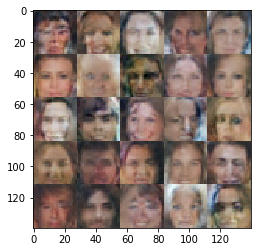

Epoch 1/1... Discriminator Loss: 0.1571... Generator Loss: 2.7401
Epoch 1/1... Discriminator Loss: 0.6870... Generator Loss: 1.9260
Epoch 1/1... Discriminator Loss: 1.9131... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 0.5966... Generator Loss: 1.5873


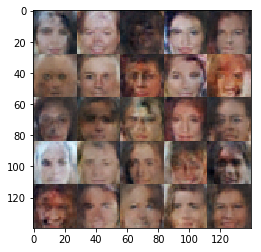

Epoch 1/1... Discriminator Loss: 0.6323... Generator Loss: 1.1751
Epoch 1/1... Discriminator Loss: 0.2168... Generator Loss: 7.6998
Epoch 1/1... Discriminator Loss: 0.3811... Generator Loss: 1.7801
Epoch 1/1... Discriminator Loss: 0.3725... Generator Loss: 1.9181


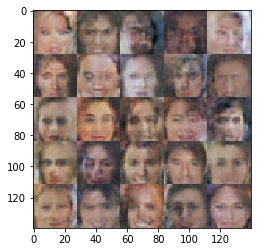

Epoch 1/1... Discriminator Loss: 0.3265... Generator Loss: 2.2947
Epoch 1/1... Discriminator Loss: 0.2438... Generator Loss: 2.2210
Epoch 1/1... Discriminator Loss: 0.2002... Generator Loss: 4.1662
Epoch 1/1... Discriminator Loss: 0.5054... Generator Loss: 1.4153


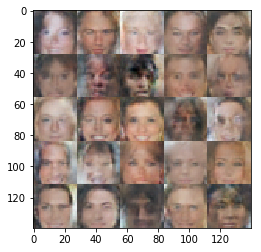

Epoch 1/1... Discriminator Loss: 0.6037... Generator Loss: 1.9248
Epoch 1/1... Discriminator Loss: 0.2748... Generator Loss: 3.6649
Epoch 1/1... Discriminator Loss: 1.2002... Generator Loss: 0.5076
Epoch 1/1... Discriminator Loss: 0.3265... Generator Loss: 2.1343


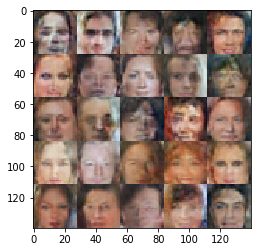

Epoch 1/1... Discriminator Loss: 0.5611... Generator Loss: 1.2822
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 1.4381
Epoch 1/1... Discriminator Loss: 0.8618... Generator Loss: 0.7840
Epoch 1/1... Discriminator Loss: 0.4999... Generator Loss: 1.6236


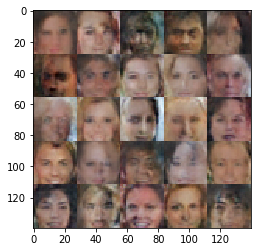

Epoch 1/1... Discriminator Loss: 0.3411... Generator Loss: 2.4736
Epoch 1/1... Discriminator Loss: 0.2181... Generator Loss: 3.1727
Epoch 1/1... Discriminator Loss: 0.4492... Generator Loss: 3.9061
Epoch 1/1... Discriminator Loss: 0.6919... Generator Loss: 1.0123


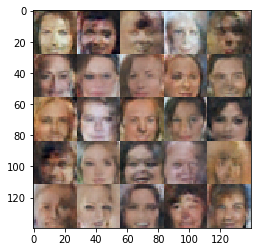

Epoch 1/1... Discriminator Loss: 0.9491... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.0526... Generator Loss: 1.3201
Epoch 1/1... Discriminator Loss: 0.5542... Generator Loss: 1.5780
Epoch 1/1... Discriminator Loss: 1.2408... Generator Loss: 0.4532


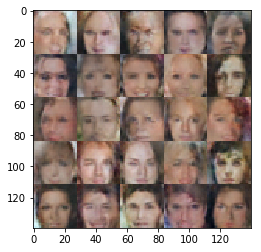

Epoch 1/1... Discriminator Loss: 0.1408... Generator Loss: 3.4931
Epoch 1/1... Discriminator Loss: 0.6228... Generator Loss: 0.9527
Epoch 1/1... Discriminator Loss: 1.9292... Generator Loss: 0.2268
Epoch 1/1... Discriminator Loss: 0.4084... Generator Loss: 2.1223


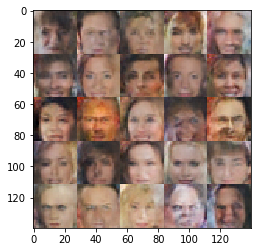

Epoch 1/1... Discriminator Loss: 0.6701... Generator Loss: 1.2603
Epoch 1/1... Discriminator Loss: 1.1410... Generator Loss: 0.9250
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 0.9861
Epoch 1/1... Discriminator Loss: 0.9625... Generator Loss: 0.8351


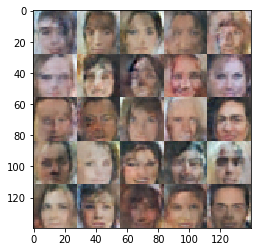

Epoch 1/1... Discriminator Loss: 0.7952... Generator Loss: 1.0114
Epoch 1/1... Discriminator Loss: 0.5887... Generator Loss: 4.5699
Epoch 1/1... Discriminator Loss: 0.5429... Generator Loss: 1.1320
Epoch 1/1... Discriminator Loss: 0.2905... Generator Loss: 2.6665


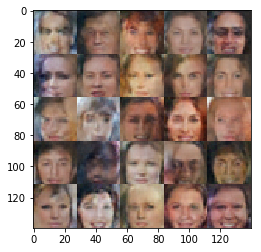

Epoch 1/1... Discriminator Loss: 0.8949... Generator Loss: 0.7123
Epoch 1/1... Discriminator Loss: 0.1414... Generator Loss: 5.9163
Epoch 1/1... Discriminator Loss: 0.9551... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 0.3689... Generator Loss: 1.8722


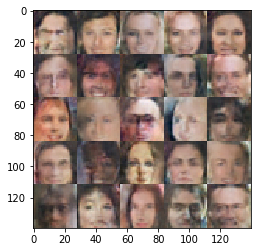

Epoch 1/1... Discriminator Loss: 1.0702... Generator Loss: 1.6173
Epoch 1/1... Discriminator Loss: 0.6989... Generator Loss: 0.8914
Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.5050
Epoch 1/1... Discriminator Loss: 0.5253... Generator Loss: 1.9975


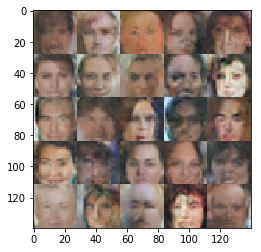

Epoch 1/1... Discriminator Loss: 0.5617... Generator Loss: 1.2847
Epoch 1/1... Discriminator Loss: 0.7838... Generator Loss: 0.8610
Epoch 1/1... Discriminator Loss: 0.8739... Generator Loss: 1.0509
Epoch 1/1... Discriminator Loss: 1.5673... Generator Loss: 0.4015


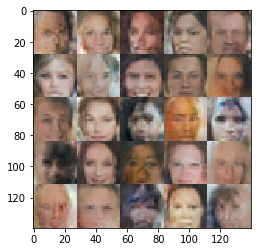

Epoch 1/1... Discriminator Loss: 0.9052... Generator Loss: 0.7143
Epoch 1/1... Discriminator Loss: 0.4543... Generator Loss: 1.7483
Epoch 1/1... Discriminator Loss: 0.9495... Generator Loss: 0.7527
Epoch 1/1... Discriminator Loss: 0.2221... Generator Loss: 3.9533


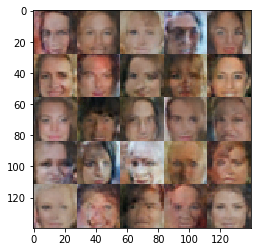

Epoch 1/1... Discriminator Loss: 0.3597... Generator Loss: 1.8657
Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.0296... Generator Loss: 0.7777
Epoch 1/1... Discriminator Loss: 1.4881... Generator Loss: 0.5471


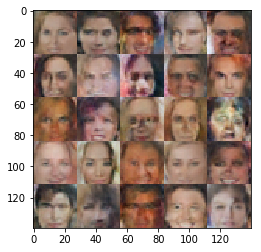

Epoch 1/1... Discriminator Loss: 0.5303... Generator Loss: 1.0876
Epoch 1/1... Discriminator Loss: 1.5926... Generator Loss: 0.3706
Epoch 1/1... Discriminator Loss: 0.4616... Generator Loss: 1.5043
Epoch 1/1... Discriminator Loss: 0.8043... Generator Loss: 0.9567


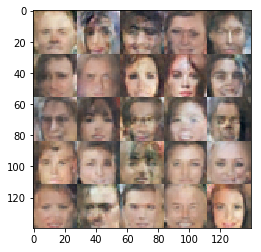

Epoch 1/1... Discriminator Loss: 1.1619... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.1553... Generator Loss: 0.5944
Epoch 1/1... Discriminator Loss: 0.6661... Generator Loss: 1.1506
Epoch 1/1... Discriminator Loss: 1.5195... Generator Loss: 0.3794


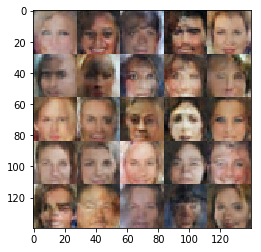

Epoch 1/1... Discriminator Loss: 0.9586... Generator Loss: 0.6335
Epoch 1/1... Discriminator Loss: 0.2272... Generator Loss: 2.7526
Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 0.4284... Generator Loss: 1.6019


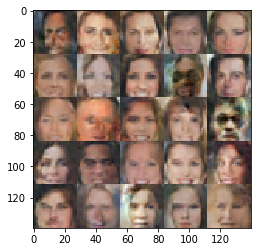

Epoch 1/1... Discriminator Loss: 0.8080... Generator Loss: 1.2026
Epoch 1/1... Discriminator Loss: 0.8683... Generator Loss: 1.3475
Epoch 1/1... Discriminator Loss: 0.6787... Generator Loss: 1.7111
Epoch 1/1... Discriminator Loss: 0.3841... Generator Loss: 1.6941


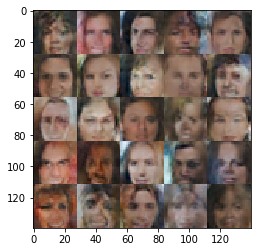

Epoch 1/1... Discriminator Loss: 0.7348... Generator Loss: 1.0312
Epoch 1/1... Discriminator Loss: 0.4426... Generator Loss: 3.4263
Epoch 1/1... Discriminator Loss: 0.3194... Generator Loss: 2.7551
Epoch 1/1... Discriminator Loss: 0.2945... Generator Loss: 1.6586


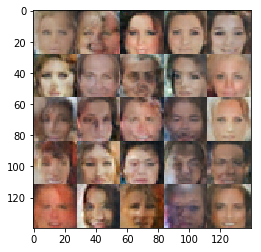

Epoch 1/1... Discriminator Loss: 0.2522... Generator Loss: 2.6034
Epoch 1/1... Discriminator Loss: 0.5397... Generator Loss: 1.2709
Epoch 1/1... Discriminator Loss: 0.4267... Generator Loss: 1.7451
Epoch 1/1... Discriminator Loss: 1.1956... Generator Loss: 0.4468


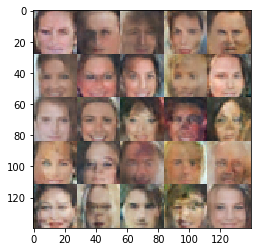

Epoch 1/1... Discriminator Loss: 0.9896... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.2501... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.0198... Generator Loss: 0.6931
Epoch 1/1... Discriminator Loss: 0.2068... Generator Loss: 2.5616


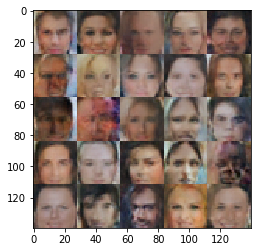

Epoch 1/1... Discriminator Loss: 0.6000... Generator Loss: 2.1168
Epoch 1/1... Discriminator Loss: 0.2497... Generator Loss: 2.5972
Epoch 1/1... Discriminator Loss: 0.2288... Generator Loss: 3.9973
Epoch 1/1... Discriminator Loss: 0.7284... Generator Loss: 1.3471


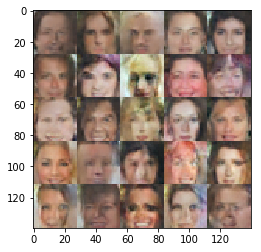

Epoch 1/1... Discriminator Loss: 0.6714... Generator Loss: 1.1663
Epoch 1/1... Discriminator Loss: 1.0489... Generator Loss: 0.6327
Epoch 1/1... Discriminator Loss: 1.1134... Generator Loss: 0.9619
Epoch 1/1... Discriminator Loss: 0.6347... Generator Loss: 1.0291


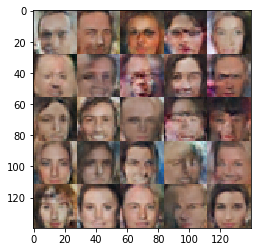

Epoch 1/1... Discriminator Loss: 0.2742... Generator Loss: 3.4537
Epoch 1/1... Discriminator Loss: 0.3263... Generator Loss: 4.3782


In [52]:
batch_size = 10
z_dim = 50
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.